In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# BERT

In [2]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8371616005897522, 'full_set_var_values': [0.045681219547986984, 0.030603904277086258, 0.029345836490392685, 0.026773635298013687, 0.02451908029615879, 0.022191615775227547, 0.02012275904417038, 0.018668321892619133, 0.01699906215071678, 0.0161441620439291, 0.015137050300836563, 0.01488886121660471, 0.014030903577804565, 0.013279978185892105, 0.012955030426383018, 0.012708143331110477, 0.012045631185173988, 0.011758376844227314, 0.011413678526878357, 0.01112492848187685, 0.010817628353834152, 0.010292262770235538, 0.010020196437835693, 0.0099154869094491, 0.00980390701442957, 0.009520405903458595, 0.009171979501843452, 0.009023783728480339, 0.008810154162347317, 0.008649900555610657, 0.008559624664485455, 0.008421508595347404, 0.008255038410425186, 0.008040486834943295, 0.00796289462596178, 0.007754337042570114, 0.007561211474239826, 0.007403586059808731, 0.007246369495987892, 0.007178264670073986, 0.007105707190930843, 0.007073891814798117, 0

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']
subset_sizes = modelling_metrics['subset_size']

In [4]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [5]:
file_list = glob.glob('./Eval-Results-bert-base-uncased/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [6]:
len(odd_results)

8

In [7]:
results = {}

In [8]:
results['subset_size'] = subset_sizes
results['r2_value'] = variance_metrics['r2_values']
results['test_accuracy'] = modelling_metrics['test_accuracies']
results['test_loss'] = modelling_metrics['test_losses']

In [9]:
subset_sizes = modelling_metrics['subset_size']

for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [10]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value,test_accuracy,test_loss,reddit_loss,reddit_accuracy,twitter_rd_loss,twitter_rd_accuracy,fin_sent_loss,fin_sent_accuracy,kindle_loss,kindle_accuracy,rottent_tomatoes_loss,rottent_tomatoes_accuracy,sst2_loss,sst2_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy
0,2500,0.827268,0.84924,0.354975,0.693257,0.604472,0.631577,0.632491,0.517752,0.763643,0.341858,0.856333,0.470588,0.778612,0.416958,0.806193,0.635345,0.637703,0.309053,0.878421
1,5000,0.832992,0.86464,0.315146,0.866507,0.554777,0.729213,0.610145,0.526821,0.733038,0.358630,0.852667,0.427693,0.803002,0.350759,0.845183,0.692161,0.622666,0.287472,0.883947
2,7500,0.834808,0.87212,0.309031,0.840686,0.557224,0.746855,0.587409,0.552791,0.754425,0.343754,0.859583,0.503822,0.785178,0.359660,0.849771,0.670221,0.627813,0.281490,0.885974
3,10000,0.835812,0.87452,0.291922,0.723395,0.612685,0.667092,0.636092,0.518250,0.748525,0.347513,0.858000,0.421359,0.801126,0.330927,0.860092,0.627712,0.658795,0.275166,0.885421
4,12500,0.836299,0.87344,0.298309,0.792264,0.594765,0.725504,0.607417,0.537415,0.745575,0.329721,0.869083,0.449636,0.815197,0.345549,0.862385,0.671020,0.637804,0.316007,0.860895
5,15000,0.836610,0.88776,0.291098,0.905291,0.590617,0.761927,0.623805,0.563106,0.707227,0.380708,0.861583,0.495604,0.803940,0.357733,0.863532,0.652698,0.671107,0.306264,0.865342
6,17500,0.836960,0.87796,0.284541,0.589837,0.687352,0.577088,0.694222,0.539961,0.703909,0.309346,0.868083,0.477526,0.784240,0.363738,0.821101,0.589823,0.692502,0.327960,0.846395
7,20000,0.837186,0.86952,0.295274,0.910433,0.527440,0.806101,0.553295,0.628989,0.667035,0.382894,0.840917,0.393634,0.819887,0.303271,0.880734,0.737065,0.564335,0.302919,0.877211
8,22500,0.837203,0.88560,0.271968,0.868203,0.519808,0.759972,0.564264,0.620846,0.698746,0.358330,0.847583,0.378322,0.822702,0.283305,0.888761,0.726416,0.577959,0.306925,0.871184
9,25000,0.837535,0.87224,0.297661,0.833758,0.560169,0.716883,0.603983,0.609781,0.687316,0.398882,0.840750,0.378755,0.821764,0.283687,0.885321,0.668245,0.615400,0.302332,0.879158


In [11]:
results_df['mean_odd_accuracy'] = results_df[['sst2_accuracy', 'tweet_eval_accuracy', 'yelp_accuracy', 'kindle_accuracy', 'twitter_rd_accuracy', 'rottent_tomatoes_accuracy', 'reddit_accuracy', 'fin_sent_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['sst2_loss', 'tweet_eval_loss', 'yelp_loss', 'kindle_loss', 'twitter_rd_loss', 'rottent_tomatoes_loss', 'reddit_loss', 'fin_sent_loss']].mean(axis=1)
results_df

,subset_size,r2_value,test_accuracy,test_loss,reddit_loss,reddit_accuracy,twitter_rd_loss,twitter_rd_accuracy,fin_sent_loss,fin_sent_accuracy,...,rottent_tomatoes_loss,rottent_tomatoes_accuracy,sst2_loss,sst2_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy,mean_odd_accuracy,mean_odd_loss
0,2500,0.827268,0.84924,0.354975,0.693257,0.604472,0.631577,0.632491,0.517752,0.763643,...,0.470588,0.778612,0.416958,0.806193,0.635345,0.637703,0.309053,0.878421,0.744733,0.502049
1,5000,0.832992,0.86464,0.315146,0.866507,0.554777,0.729213,0.610145,0.526821,0.733038,...,0.427693,0.803002,0.350759,0.845183,0.692161,0.622666,0.287472,0.883947,0.738178,0.529907
2,7500,0.834808,0.87212,0.309031,0.840686,0.557224,0.746855,0.587409,0.552791,0.754425,...,0.503822,0.785178,0.359660,0.849771,0.670221,0.627813,0.281490,0.885974,0.738422,0.537410
3,10000,0.835812,0.87452,0.291922,0.723395,0.612685,0.667092,0.636092,0.518250,0.748525,...,0.421359,0.801126,0.330927,0.860092,0.627712,0.658795,0.275166,0.885421,0.757592,0.488927
4,12500,0.836299,0.87344,0.298309,0.792264,0.594765,0.725504,0.607417,0.537415,0.745575,...,0.449636,0.815197,0.345549,0.862385,0.671020,0.637804,0.316007,0.860895,0.749140,0.520889
5,15000,0.836610,0.88776,0.291098,0.905291,0.590617,0.761927,0.623805,0.563106,0.707227,...,0.495604,0.803940,0.357733,0.863532,0.652698,0.671107,0.306264,0.865342,0.748394,0.552916
6,17500,0.836960,0.87796,0.284541,0.589837,0.687352,0.577088,0.694222,0.539961,0.703909,...,0.477526,0.784240,0.363738,0.821101,0.589823,0.692502,0.327960,0.846395,0.762225,0.471910
7,20000,0.837186,0.86952,0.295274,0.910433,0.527440,0.806101,0.553295,0.628989,0.667035,...,0.393634,0.819887,0.303271,0.880734,0.737065,0.564335,0.302919,0.877211,0.716357,0.558163
8,22500,0.837203,0.88560,0.271968,0.868203,0.519808,0.759972,0.564264,0.620846,0.698746,...,0.378322,0.822702,0.283305,0.888761,0.726416,0.577959,0.306925,0.871184,0.723876,0.537790
9,25000,0.837535,0.87224,0.297661,0.833758,0.560169,0.716883,0.603983,0.609781,0.687316,...,0.378755,0.821764,0.283687,0.885321,0.668245,0.615400,0.302332,0.879158,0.736733,0.524040


<Axes: >

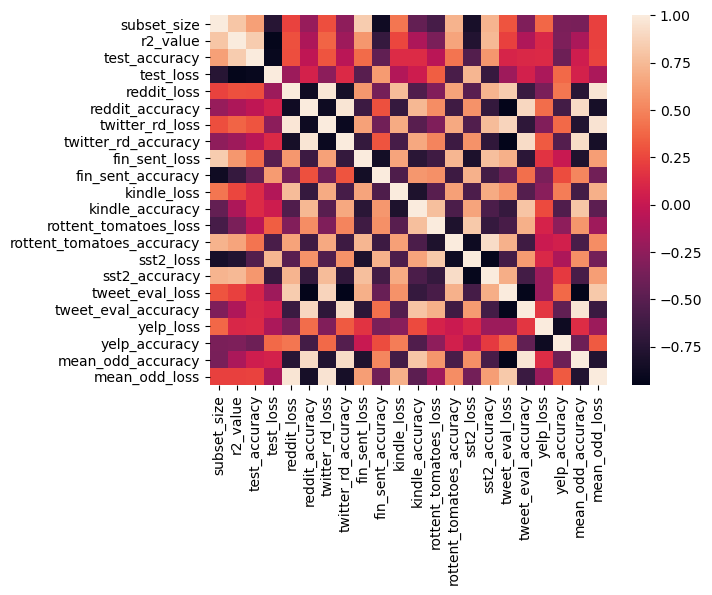

In [12]:
sns.heatmap(results_df.corr())

[(0.82, 0.85)]

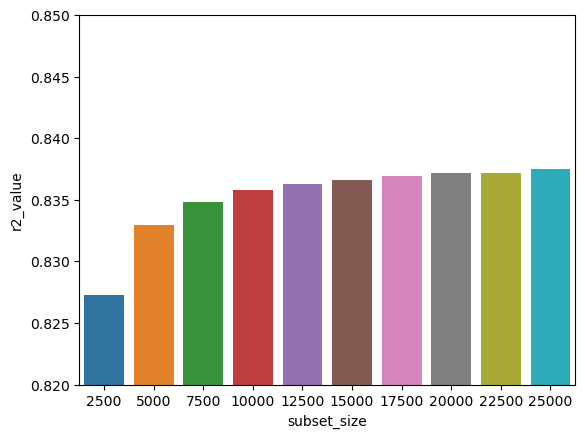

In [19]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['r2_value'])
plot.set(ylim=(0.82, 0.85))

[(0.7, 0.9)]

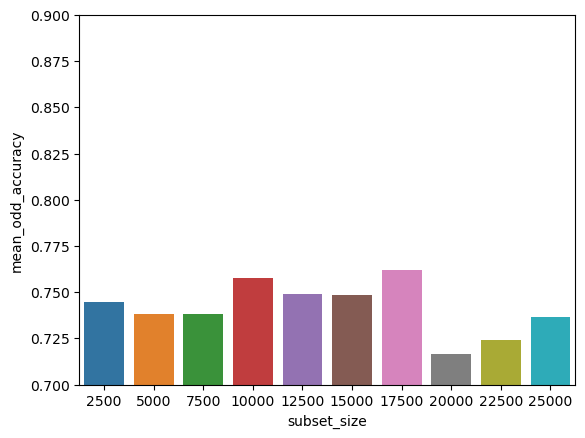

In [20]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'])
plot.set(ylim=(0.7, 0.9))

[(0.4, 0.6)]

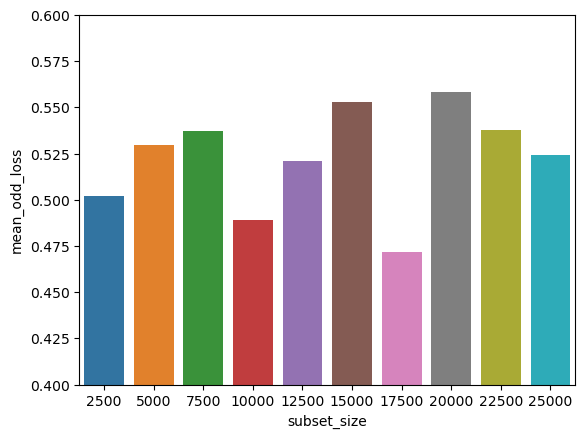

In [21]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])
plot.set(ylim=(0.4, 0.6))

[(0.4, 0.9)]

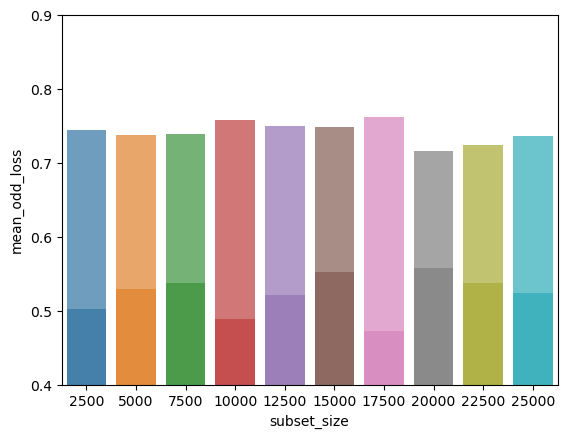

In [22]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.9))


[(0.2, 0.9)]

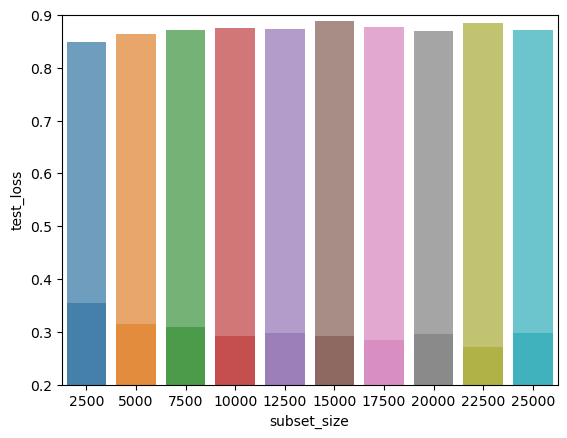

In [23]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7)
plot.set(ylim=(0.2, 0.9))

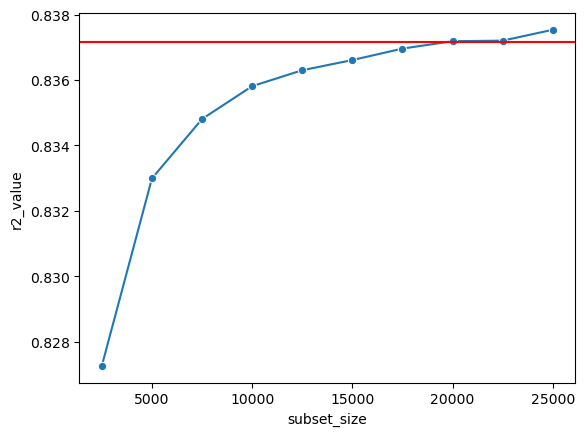

In [24]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')

(0.4, 0.8)

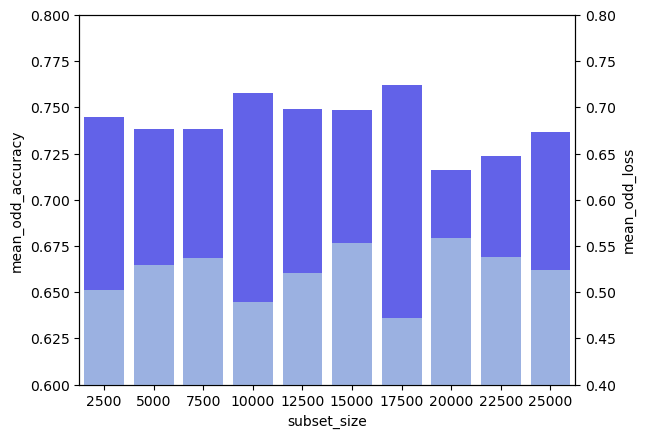

In [16]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.6, 0.8)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.4, 0.8)

(0.1, 0.6)

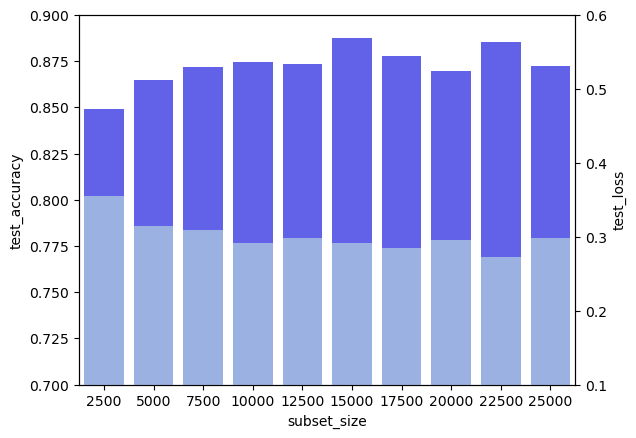

In [17]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.7, 0.9)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.1, 0.6)

In [18]:
results_df.to_csv('../analysis_results/imdb_bert.csv', index=False)